# Beleg3 - Logistische Regression und Regulierung
#### Erweitern Sie Ihre Lösung zur multivariaten Regression um die logistische Regression.

#### Lineare Hypothesis aus Beleg2

In [1]:
def linear_hypothesis(theta):
    return lambda X: X.dot(theta) 

#### Cost function - E_in error (Beleg 2)

In [2]:
def linear_cost_function(X,y):
    m = X.shape[0]
    return lambda theta: 1./(2*m)*((linear_hypothesis(theta)(X)-y)**2).sum()

## Aufgabe 1
#### Erstellen Sie zuerst zum Testen Ihrer Lösung künstliche Datenwerte für zwei Merkmale (Features)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

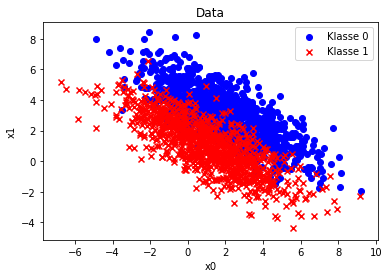

In [4]:
# artifical dataset for logistic regression
import numpy as np
import matplotlib.pyplot as plt

# class 0: covariance matrix and mean
cov0 = np.array([[5,-3],[-3,3]])
mean0 = np.array([2.,3])

# number of data points
m0 = 1000
# generate m0 gaussian distributed data points with mean0 and cov
r0 = np.random.multivariate_normal(mean0, cov0, m0) #(1000,2)

# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 1000
r1 = np.random.multivariate_normal(mean1, cov1, m1) #(1000,2)

plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Data")
plt.legend(frameon=True, fancybox=True)
plt.show()

In [5]:
# generate matrix
X = np.concatenate((r0,r1))
y = np.zeros(len(r0)+len(r1))
y[:len(r0),] = 1

print(y)
raw_X = X.copy()
raw_X

[1. 1. 1. ... 0. 0. 0.]


array([[ 4.71468161,  0.26769404],
       [ 0.43213222,  4.1084981 ],
       [ 5.09346298,  2.49705703],
       ...,
       [ 0.3053872 ,  3.01847682],
       [-2.04060523,  3.63679634],
       [ 1.27353335,  2.27258693]])

In [6]:
# insert first column of ones into matrxi
X= np.insert(X, 0, values=1, axis=1) 
train_samples = X.shape[0]

In [7]:
print("Amount of training data: ", train_samples)
print("X Matrix:")
print(X)

Amount of training data:  2000
X Matrix:
[[ 1.          4.71468161  0.26769404]
 [ 1.          0.43213222  4.1084981 ]
 [ 1.          5.09346298  2.49705703]
 ...
 [ 1.          0.3053872   3.01847682]
 [ 1.         -2.04060523  3.63679634]
 [ 1.          1.27353335  2.27258693]]


### Logistic function (Sigmoid):

Funktion mit folgendem Output: $0 \leq g(z) \leq 1$ --> $g(z) = \frac{1}{1 + \exp(-z)}$

### Logistische Regressionshypothesis:

$h_\theta(\vec x) = g(\vec \theta^T \vec x)$

## g(z): 

$h_\theta(\vec x) =  \frac{1}{1 + \exp(-\vec \theta^T \vec x)}$ -----> $h_\theta(\vec x) = p(y=1 \mid {\vec x}, \theta)$

In [8]:
#Calculates the sigmoid / logistic function g(z)
def logistic_function(z):
    return(1 / (1 + np.exp(-z)))

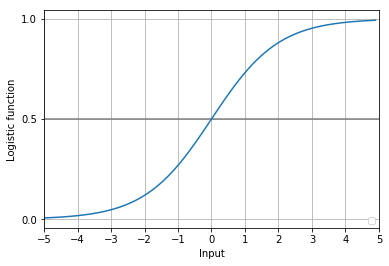

In [9]:
# plot in range -5 to 5
x = np.arange(-5, 5, 0.1)
sigmoid = logistic_function(x)
fig, ax = plt.subplots()
ax.grid(linestyle='-')
ax.set_xlabel("Input")
ax.set_ylabel("Logistic function")
plt.legend(('Logistic Regression Model', ''), loc="lower right", fontsize='small')
plt.axhline(.5, color='.5')   #y=0.5
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.xlim(-5, 5)
plt.plot(x,sigmoid)
plt.show()

## Aufgabe 2
#### Implementieren Sie die Hypothese als Python Funktion:

#### Logistische Hypothese (Formel):

$$h_\Theta(x) = \frac{1}{1+exp(-_\Theta ^Tx)}$$

In [10]:
def logistic_hypothesis(theta):
    return lambda X: logistic_function(X.dot(theta))

## Aufgabe 3
#### Implementieren Sie den Cross-Entropy-Loss und den Squared-Error-Loss als Python Funktion. Die Pythonfunktion soll dabei eine Funktion zurückgeben:


In [11]:
def cross_entropy(h, X, y):
    return lambda theta: (np.multiply(y, np.log(h(theta)(X)))) + (np.multiply((1-y), np.log(1-h(theta)(X))))

# test
loss = cross_entropy(logistic_hypothesis, X, y)
theta_attempt = np.array([0, 2, 0])
print("test of cross_entropy function:")
print(loss(theta_attempt))   

test of cross_entropy function:
[-8.03271103e-05 -3.51615128e-01 -3.76587666e-05 ... -1.04445777e+00
 -1.67460117e-02 -2.62246266e+00]


# Aufgabe 4
#### Implementieren Sie die Kostenfunktion J als Python Funktion:
Zusätzlich zu X und y soll die Funktion die Hypothese h und den Loss aufnehmen.
Die Pythonfunktion soll dabei eine Funktion zurückgeben, die den Parametervektor theta aufnimmt.

## Cost function
$\large J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$

In [12]:
# parameter train stands for the amount of training data
# this makes the function callable outside of this context  
def cost_function(loss_, theta, train):
    m = train
    return -(1./m) * loss_(theta).sum()

In [13]:
# test
thetas =  np.array([0, 0.5, 0.5])
j = cost_function(loss, thetas, train_samples)
print("test of cost_function:")
print(j)

test of cost_function:
0.7400763878927389


## Aufgabe 5
#### Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der Hypothese

### 5a) Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte:

In [14]:
def compute_new_theta(X, y, theta, alpha, hypothesis):
    m = y.shape[0]
    new_thetas = theta-alpha*(1.0/m)*(np.dot(X.T,((hypothesis(theta)(X))-y)))
    return new_thetas

# test
h = logistic_hypothesis
print("test of compute_new_theta:")
print(compute_new_theta(X, y, thetas, 0.01, h))

test of compute_new_theta:
[-0.00314039  0.4957849   0.49773367]


### 5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta.
#### Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten. Kapseln Sie dies in eine Funktion:

In [15]:
def gradient_descent(alpha, theta, nb_iterations, X_, y):
    #Stores costs for each iteration
    costs = [] #cost = np.zeros(nb_iterations)
       
    #stores changes in theta for each iteration
    temp_thetas = np.matrix(np.zeros(X_.shape))

    loss = cross_entropy(logistic_hypothesis, X_, y)
    
    #starting cost value
    j = cost_function(loss,theta, X_.shape[0])
    
    costs.append(j)   
    
    #Iterates all nb_iterations
    for i in range(nb_iterations-1):
        #compute new thetas
        temp_thetas = compute_new_theta(X_,y,theta,alpha,logistic_hypothesis)
        #update
        theta = temp_thetas
        #new cost function is computed 
        loss = cross_entropy(logistic_hypothesis, X_, y)
        j = cost_function(loss, theta, X_.shape[0])
        cost = j
        #new cost appended
        costs.append(cost)

    return {'theta': theta, "costs": costs, "last_cost": costs[nb_iterations-1]}

#### Gradient descent for different theta arrays

In [16]:
import matplotlib.pyplot as plt 

iterations: 15000, alpha: 0.01
Starting theta values:  [0. 0. 0.]
Last theta values:  [-5.08924095  1.15656065  1.70137749]
Cost:  0.27760488642256703


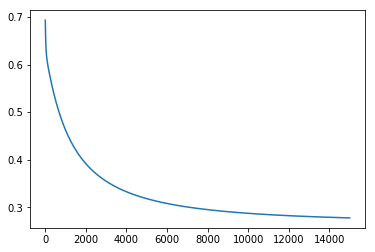

In [17]:
initial_theta = np.zeros(3)
iteration = 15000
print("iterations: 15000, alpha: 0.01")
print("Starting theta values: ", initial_theta )
gradient0 =  gradient_descent(0.01, initial_theta , iteration, X, y)
print("Last theta values: ", gradient0["theta"])
print("Cost: ", gradient0["last_cost"])

# plotting the costs
values = gradient0["costs"]
fig = plt.figure()
plt.plot(values)

plt.show()

# best thetas for lowest costs
final_theta = gradient0['theta']

#### Testing with different theta arrays
Cells need to be converted to code

iterations: 1000, alpha: 0.01
Starting theta values:  [1.  0.5 0.3]
Last theta values:  [-0.68402246  0.23924783  0.4204888 ]
Cost:  0.5159240143888988


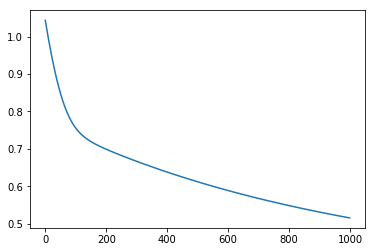

In [18]:
thetas1 = np.array([1.,0.5,0.3])
print("iterations: 1000, alpha: 0.01")
print("Starting theta values: ", thetas1)
gradient1 =  gradient_descent(0.01, thetas1, 1000, X, y)
print("Last theta values: ", gradient1["theta"])
print("Cost: ", gradient1["last_cost"])

#plotting the cost
values = gradient1["costs"]
fig = plt.figure()
plt.plot(values)

plt.show()

iterations: 2000, alpha: 0.01
Starting theta values:  [0.5 0.5 0.3]
Last theta values:  [-1.80814538  0.46785403  0.72958418]
Cost:  0.40089217175506575


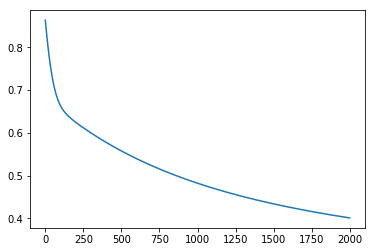

In [19]:
thetas2 = np.array([0.5,0.5,0.3])
print("iterations: 2000, alpha: 0.01")
print("Starting theta values: ", thetas2)
gradient2 =  gradient_descent(0.01, thetas2, 2000, X, y)
print("Last theta values: ", gradient2["theta"])
print("Cost: ", gradient2["last_cost"])

#plotting the costs
plt.plot(gradient2["costs"])
plt.show()

iterations: 2000, alpha: 0.01
Starting theta values:  [0.5 0.3 0.1]
Last theta values:  [-1.77340483  0.46070586  0.71976376]
Cost:  0.4036414123892926


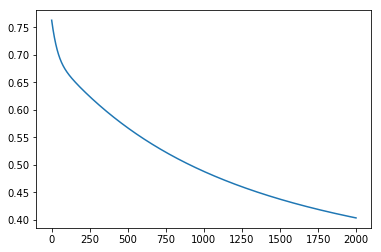

In [20]:
thetas3 = np.array([0.5,0.3,0.1])
print("iterations: 2000, alpha: 0.01")
print("Starting theta values: ", thetas3)
gradient3 =  gradient_descent(0.01, thetas3, 2000, X,y)
print("Last theta values: ", gradient3["theta"])
print("Cost: ", gradient3["last_cost"])

#plotting the costs
plt.plot(gradient3["costs"])
plt.show()


iterations: 2500, alpha: 0.01
Starting theta values:  [1.  0.5 2. ]
Last theta values:  [-2.12255601  0.53275469  0.81910097]
Cost:  0.37798239711209336


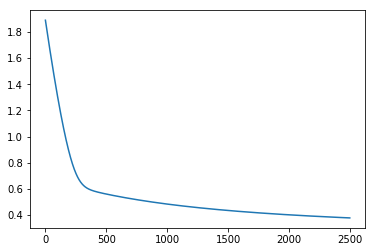

In [21]:
thetas4 = np.array([1, 0.5, 2])#same values as in theta_log-array (s. oben)
print("iterations: 2500, alpha: 0.01")
print("Starting theta values: ", thetas4)
gradient4 =  gradient_descent(0.01, thetas4, 2500, X, y)
print("Last theta values: ", gradient4["theta"])
print("Cost: ", gradient4["last_cost"])

#plotting the costs
plt.plot(gradient4["costs"])
plt.show()

iterations: 2000, alpha: 0.01
Starting theta values:  [0.5 0.5 0.5]
Last theta values:  [-1.82896875  0.47214089  0.73547752]
Cost:  0.39926584528945874


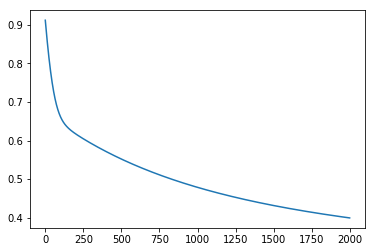

In [22]:
thetas5 = np.array([0.5, 0.5, 0.5])#same values as in theta_log-array (s. oben)
print("iterations: 2000, alpha: 0.01")
print("Starting theta values: ", thetas5)
gradient5 =  gradient_descent(0.01, thetas5, 2000, X,y)
print("Last theta values: ", gradient5["theta"])
print("Cost: ", gradient5["last_cost"])

#plotting the costs
plt.plot(gradient5["costs"])
plt.show()

## Aufgabe 6
#### Zeichen Sie die Entscheidungsebene in den Scatter-Plot der Daten.
Hinweis: Für diese gilt: theta[0] + theta[1] * x1 + theta[2] * x2 = 0.5


### Decision boundary

In [23]:
def plot_decision_boundary(X,theta, y_):
    #Definition von einem Range in den X-Werten
    plot_x = np.array([min(X[:,1])-2, max(X[:,1])+2])
    plot_y = -(theta[1]*plot_x + theta[0])/theta[2]
    return plot_x, plot_y

## 2D-Plot

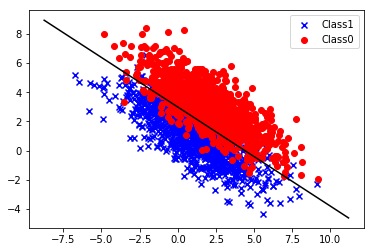

In [24]:
new_thetas = final_theta

posX1 = X[:,1][y==0]
posX2 = X[:,2][y==0]

negX1 = X[:,1][y==1]
negX2 = X[:,2][y==1]

plt.figure("2D Plot")

plt.scatter(posX1, posX2, color='blue', marker="x", label="Class1")
plt.scatter(negX1, negX2, color='red', marker="o", label="Class0")

plot_x = X[:,1]
plot_y = -(new_thetas [1]*plot_x +new_thetas[0])/new_thetas[2]
plotx, ploty = plot_decision_boundary(X, new_thetas,y)
plt.plot(plotx, ploty, color='k')

plt.legend()
plt.show()

# Regularization

## Aufgabe 7
#### Berechnen Sie den Klassifikationsfehler, d.h. der Anteil der falsch-klassifizierten Datensätze:
Klassifikationsfehler = Anzahl der falsch-klassifizierten Datensätze / Anzahl der Datensätze

# false classified y=0
false_class1 = X[y==1][h(X[y == 1]) < 0.5]
false_1 = false_class1.shape[0]
false_1

# false classified y=0
false_class0 = X[y==0][h(X[y == 0]) >= 0.5]
false_0 = false_class0.shape[0]
false_0

# false classified / amount of training data
m = train_samples
#'<' not supported between instances of 'function' and 'float'
#(X[y==1][h(X[y == 1])<0.5].shape[0] + X[y==0][h(X[y==0])>=0.5].shape[0])/m #

class_error = (false_1+false_0)/m
print("Klassifizierungsfehler: ", class_error)
print("Klassifizierungsfehler in Prozent: ", round(class_error*100, 2), "%")

In [25]:
#Alternative Berechnung, falls obige Berechnung Exception wirft
#Berechnung tut genau dasselbe
h = logistic_hypothesis(new_thetas)
ya = h(X)
res = 0
for i in range (len(y)):
    if(ya[i]>=0.5):
        temp=1
    else:
        temp=0
    if(temp!=y[i]):
        res = res+1
print((res/len(y))*100,"%")

11.5 %


## Aufgabe 8
#### Erweitern Sie die Kostenfunktion um den Regulierungsterm lambda_reg

Normale cost function: def cost_function(loss_, theta, train): return -(1./m) * loss_(theta).sum()

$J(\theta) = \frac{1}{m}\sum_{i=1}^m(-y_i log(h_i(\theta)) - (1-y_i)log(1-h_i(\theta))) + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$

In [26]:
def cost_function_reg2(loss, train, theta, lambda_reg):
    m = train
    return (-1)*(1./m)*loss(theta).sum() + lambda_reg*(1./(2*m))*(theta[1:,]**2).sum()

# test 
print ("test of cost_function_reg2:")
l_reg = 2000
thetas =  np.array([0, 0.5, 0.5])

j = cost_function_reg2(loss, train_samples, thetas, l_reg)
print(j)

test of cost_function_reg2:
0.9900763878927389


## Aufgabe 9
#### Erweitern Sie den Gradientenabstieg um den Regulierungsterm lambda_reg

In [27]:
def compute_new_theta_reg(X, y, theta, alpha, hypothesis, lam):
    # make an array of lambdas
    lamarray = np.ones(len(theta)) * lam
    # zero out first element so we don't regularize constant term
    lamarray[0] = 0.0
    
    m = y.shape[0]
    
    new_thetas = theta - (alpha * ((1.0/m)*np.dot(X.T,((hypothesis(theta)(X)) - y)) + (lamarray*theta)*(1.0/m)))
    return new_thetas

# test
h = logistic_hypothesis
lam_test = 1000
print("test of compute_new_theta_reg:")
print(compute_new_theta_reg(X, y, thetas, 0.01, h, lam_test))

test of compute_new_theta_reg:
[-0.00314039  0.4932849   0.49523367]


In [28]:
def gradient_descent_reg2(alpha, theta, nb_iterations, X_, y, lam):
    #Stores costs for each iteration
    costs = [] #cost = np.zeros(nb_iterations)
       
    #stores changes in theta for each iteration
    temp_thetas = np.matrix(np.zeros(X_.shape))
    
    loss = cross_entropy(logistic_hypothesis, X_, y)
    
    #starting cost value
    j = cost_function_reg2(loss, X_.shape[0], theta, lam)
    
    costs.append(j)   
    
    #Iterates all nb_iterations
    for i in range(nb_iterations-1):
        #compute new thetas
        temp_thetas = compute_new_theta_reg(X_,y,theta,alpha,logistic_hypothesis, lam)
        #update
        theta = temp_thetas
        
        #new cost function is computed 
        loss = cross_entropy(logistic_hypothesis, X_, y)
        j = cost_function_reg2(loss, X_.shape[0], theta, lam)
        cost = j
        #new cost appended
        costs.append(cost)

    return {'theta': theta, "costs": costs, "last_cost": costs[nb_iterations-1]}

iterations: 15000, alpha: 0.01
Starting theta values:  [0. 0. 0.]
Last theta values with regularization:  [-1.44282179  0.30924793  0.48178266]
Cost:  0.5395170982859786


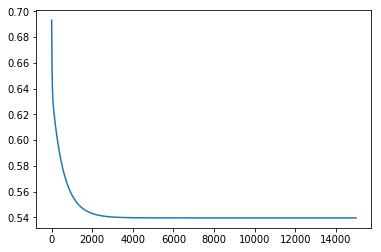

In [29]:
initial_theta = np.zeros(3)
iteration = 15000
print("iterations: 15000, alpha: 0.01")
print("Starting theta values: ", initial_theta )
gradient0 =  gradient_descent_reg2(0.01, initial_theta , iteration, X, y, lam_test)
print("Last theta values with regularization: ", gradient0["theta"])
print("Cost: ", gradient0["last_cost"])

# plotting the regulized costs
values = gradient0["costs"]
fig = plt.figure()
plt.plot(values)

plt.show()

final_theta_reg = gradient0['theta']

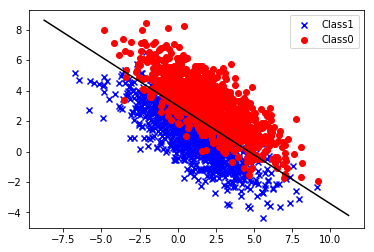

In [30]:
new_thetas = final_theta_reg


posX1 = X[:,1][y==0]
posX2 = X[:,2][y==0]

negX1 = X[:,1][y==1]
negX2 = X[:,2][y==1]

plt.figure("2D Plot")

plt.scatter(posX1, posX2, color='blue', marker="x", label="Class1")
plt.scatter(negX1, negX2, color='red', marker="o", label="Class0")

plot_x = X[:,1]
plot_y = -(new_thetas [1]*plot_x +new_thetas[0])/new_thetas[2]
plotx, ploty = plot_decision_boundary(X, new_thetas,y)
plt.plot(plotx, ploty, color='k')

plt.legend()
plt.show()

# Beleg3 - Bias Variance Analyse

#### Theorie: http://christianherta.de/lehre/dataScience/machineLearning/basics/bias-variance-tradeoff.php

Implementieren Sie die Simulation zur Berechung des Bias-Variance für zwei Datenpunkte:

- p(x) ist gleichverteilt im Intervall $[0, 2*pi]$
    - Recall: $h_\theta(x) = p(x) = g(\theta^Tx)$ --> sigmoid
- unbekannte Targetfunktion ist sin(x)
- kein Rauschen
- Erzeugen Sie z.B. 10000 verschiedene Trainingsdaten mit jeweils zwei Beispielen
    - Build 10000 datasets with 2 data each
- Bestimmen Sie die gefundenen Hypothesen für die beiden Hypothesenmengen (für die einzelnen Trainingsdaten):
- Hypothesenmenge H_0: h = theta_0
- Hypothesenmenge H_1: h = theta_0 + theta_1 * x
- Berechnen Sie hieraus E_out für H_1 und H_2
- Bestimmen Sie die durchschnittliche Hypothese für H_0 und H_1.
- Bestimmen Sie  damit den Bias und die Variance.

Erzeugen Sie die Plots  und die Ausgaben wie in http://christianherta.de/lehre/dataScience/machineLearning/basics/bias-variance-tradeoff.html

### Bias-Variance Tradeoff

In [31]:
import numpy as np
import matplotlib.pyplot as plt 

# fixieren der random erzeugten Werte
np.random.seed(1)

#Anzahl der Daten
N = 10000

#Array der X1
x1 = np.random.uniform(0,2*np.pi, N)
x2 = np.random.uniform(0,2*np.pi, N)

#Matrix der x1 und x2
X = np.column_stack((x1,x2))

y1 = np.sin(x1)
y2 = np.sin(x2)

#x ordentlich auf linspace
x_ = np.linspace(0, 2*np.pi, N)

#Berechnung der theta0s
#theta0_old = (np.sin(x2)+np.sin(x1))/2

#Formel aus Vorlesung
theta0 = (y2+y1)/2
#H0
H0 = theta0.copy()


#Berechnung der theta1s
theta1 = (y2-y1)/(x2-x1)
print(theta1[:10])

#Kanonische Formel zur Berechnung von theta0
#y-Achsenschnitt für Hypothese 1 sprich ihre theta0s
theta0_for_h1 = y1-(theta1*x1)


h1_array = []
#Lista che salva la intersezione con le assi e i theta1 - coefficienti angolari
for (y_axis,m) in zip(theta0_for_h1,theta1):
    h1_array.append([y_axis,m])

#Hypothese Modell 2
H1 = (theta0_for_h1 + theta1 * x_)
print(H1[:10])

[-0.68203067 -0.74011035 -0.21570239 -0.58404278  0.35328031  0.88226139
 -0.58972167 -0.31122186 -0.69187013 -0.97822058]
[2.28514009e+00 2.36655699e+00 6.02563354e-04 2.05477901e+00
 4.71998905e-01 3.90760396e-02 1.60880272e+00 1.49945795e+00
 2.32542345e+00 3.06473724e+00]


[0.5801805  4.52593227]
-0.38797224236341155


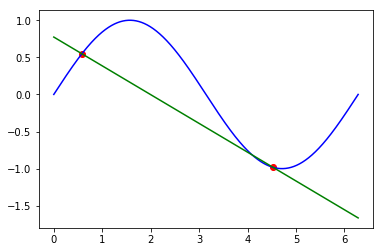

In [32]:
x_punkt= np.array((x1[5],x1[1]))
print(x_punkt)
y_punkt = np.array((y1[5], y1[1])) # y = sin 

theta1_ = (y1[1]-y1[5])/(x1[1]-x1[5])
print(theta1_)
#theta0_for_h1 = y1-(theta1*x1)
theta0_ = y1[5] - (theta1_*x1[5])
#sin funxtion
plt.plot(x_, np.sin(x_),'b-')
plt.scatter(x_punkt,y_punkt,color='r')
plt.plot(x_,  theta0_ + theta1_ *x_, 'g-')
plt.show()

0.7489403917768072


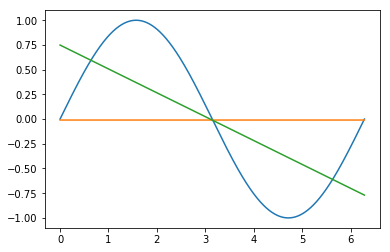

In [33]:
#Durchschnitte der Thetas für H0
theta0_avg = np.mean(theta0)

#Durchschnitt der thetas1
theta1_avg = np.mean(theta1)

#Durchschnitt der thetas0 der H1
theta0_for_h1_mean = np.mean(theta0_for_h1)

print(theta0_for_h1_mean)

##### Alternative für theta0_mean
h1_means = [np.mean(x) for x in zip(*h1_array)] 
t0_h1_mean = h1_means[0]
t1_h1_mean = h1_means[1]


#FUnktion zur Berechnung der H1s
#h1 = lambda x: (theta0_for_h1_mean + theta1_avg*x)

#Durchschnittliche Hypothese H1
h1 = lambda x: (t0_h1_mean+t1_h1_mean*x)

#new_xs = np.linspace(0,2*np.pi, N)
y_for_h0 = np.full(N, theta0_avg)

plt.plot(x_, np.sin(x_)) #sin funxtion
plt.plot(x_, y_for_h0) # constant
plt.plot(x_, h1(x_))#gerade



plt.show()

In [34]:
#Bias und Varianz
h0_y = y_for_h0[0]

bias_h0 = np.mean((h0_y - np.sin(X))**2)
print("Bias h0: ", bias_h0)

bias_h1 = np.mean((h1(X) - np.sin(X))**2)
print("Bias h1: ", bias_h1)

# Varianz
# Durchschnittliche Hypothese für Modell0 - Hypothesenmenge H0 = theta0
var_h0 = np.mean((h0_y - theta0)**2)
print("Variance h0: ", var_h0)

#durchschnittliche Hypothese auf den Werten x_
#minus Hypothesenmenge aus Modell 1
var_h1 = np.mean((h1(x_) - H1)**2)
print("Variance h1: ", var_h1)


Bias h0:  0.5005383124974977
Bias h1:  0.20818811088303427
Variance h0:  0.25647471567971897
Variance h1:  1.7181199889778451


In [35]:
expectation_Eout_0 = bias_h0+var_h0
print("model 2: E_out ≈ bias + variance:  %f ≈ %f + %f" % (expectation_Eout_0, bias_h0, var_h0))

model 2: E_out ≈ bias + variance:  0.757013 ≈ 0.500538 + 0.256475


In [36]:
expectation_Eout_1 = bias_h1+var_h1
print("model 2: E_out ≈ bias + variance:  %f ≈ %f + %f" % (expectation_Eout_1, bias_h1, var_h1))

model 2: E_out ≈ bias + variance:  1.926308 ≈ 0.208188 + 1.718120
